In [2]:
import numpy as np
import pandas as pd
import dataframe_image as dfi

In [2]:
df = pd.read_excel('Datasets_Ready.xlsx')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4510 entries, 0 to 4509
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      4510 non-null   int64  
 1   Text            4510 non-null   object 
 2   emoji           4510 non-null   object 
 3   Tokenized       4510 non-null   object 
 4   final_text      4494 non-null   object 
 5   text_emoji      4510 non-null   object 
 6   Pos_Word        4510 non-null   int64  
 7   Neg_Word        4510 non-null   int64  
 8   Total_Word      4510 non-null   int64  
 9   Pos_Ratio       4510 non-null   float64
 10  Neg_Ratio       4510 non-null   float64
 11  Sentimen_Text   4510 non-null   object 
 12  Tokenize_Emoji  4510 non-null   object 
 13  Pos_Emoji       4510 non-null   int64  
 14  Neg_Emoji       4510 non-null   int64  
 15  Sentimen_Emoji  4510 non-null   object 
 16  Sarcasm         4510 non-null   object 
dtypes: float64(2), int64(6), object(9

Unnamed: 0                                               Text  \
0           0         kawan2 sunda bersatu jemput arteria dahlan   
1           2  arteria dahlan disidang adat sunda daerah menu...   
2           4  ga ditafsirkan membanding bandingkan edy arter...   
3           5  nantik ngak divhumas polri nya bilang palsu td...   
4           6  urut dada dech kuasa hukum tdk mengerti hukum ...   

                           emoji  \
0                              😁   
1                              😁   
2                              😁   
3                              😁   
4                              😁   

                                           Tokenized  \
0  ['kawan', 'sunda', 'bersatu', 'jemput', 'arter...   
1  ['arteria', 'dahlan', 'sidang', 'adat', 'sunda...   
2  ['ga', 'tafsir', 'membanding', 'membandingkan'...   
3  ['nanti', 'tidak', 'divisi humas', 'polri', '....   
4  ['urut', 'dada', 'deh', 'kuasa', 'hukum', 'tid...   

                                          final_text  \
0          kawan sunda bersatu jemput arteria dahlan   
1  arteria dahlan sidang adat sunda daerah menunt...   
2  ga tafsir membanding membandingkan edy arteria...   
3  divisi humas polri bilang palsu mengeluarkan a...   
4  urut dada deh kuasa hukum mengerti hukum arter...   

                                          text_emoji  Pos_Word  Neg_Word  \
0        kawan sunda bersatu jemput arteria dahlan 😁         2         0   
1  arteria dahlan sidang adat sunda daerah menunt...         5         4   
2  ga tafsir membanding membandingkan edy arteria...         3         2   
3  divisi humas polri bilang palsu mengeluarkan a...         4         8   
4  urut dada deh kuasa hukum mengerti hukum arter...        14         6   

   Total_Word  Pos_Ratio  Neg_Ratio Sentimen_Text  \
0           6   0.333333   0.000000       Positif   
1           9   0.555556   0.444444       Positif   
2           9   0.333333   0.222222       Positif   
3          16   0.250000   0.500000       Negatif   
4          28   0.500000   0.214286       Positif   

                                      Tokenize_Emoji  Pos_Emoji  Neg_Emoji  \
0  ['kawan', 'sunda', 'bersatu', 'jemput', 'arter...          1          0   
1  ['arteria', 'dahlan', 'sidang', 'adat', 'sunda...          1          0   
2  ['ga', 'tafsir', 'membanding', 'membandingkan'...          1          0   
3  ['divisi', 'humas', 'polri', 'bilang', 'palsu'...          1          0   
4  ['urut', 'dada', 'deh', 'kuasa', 'hukum', 'men...          1          0   

  Sentimen_Emoji  Sarcasm  
0        Positif  Negatif  
1        Positif  Negatif  
2        Positif  Negatif  
3        Positif  Positif  
4        Positif  Negatif

In [3]:
# Remove unused column/feature
df = df.drop(columns='Unnamed: 0')
df = df.drop(columns='Text')
df = df.drop(columns='emoji')
df = df.drop(columns='Tokenized')
df = df.drop(columns='final_text')
df = df.drop(columns='Pos_Word')
df = df.drop(columns='Neg_Word')
df = df.drop(columns='Total_Word')
df = df.drop(columns='Pos_Ratio')
df = df.drop(columns='Neg_Ratio')
df = df.drop(columns='Tokenize_Emoji')
df = df.drop(columns='Pos_Emoji')
df = df.drop(columns='Neg_Emoji')
df = df.drop(columns='Sentimen_Emoji')

In [4]:
df.head()

text_emoji Sentimen_Text  Sarcasm
0        kawan sunda bersatu jemput arteria dahlan 😁       Positif  Negatif
1  arteria dahlan sidang adat sunda daerah menunt...       Positif  Negatif
2  ga tafsir membanding membandingkan edy arteria...       Positif  Negatif
3  divisi humas polri bilang palsu mengeluarkan a...       Negatif  Positif
4  urut dada deh kuasa hukum mengerti hukum arter...       Positif  Negatif

<h1>Feature Extraction Using GloVe Method</h1>

In [3]:
class GloVe:
    # constructors
    def __init__(self, corpus, embedding_size=100, window_size=5):
        self.corpus = corpus
        self.embedding_size = embedding_size
        self.window_size = window_size
        self.word2id = {}
        self.id2word = {}
        self.word2count = {}
        self.vocab_size = 0
        self.co_matrix = None
        self.embedding = None
        self.bias = None

    def build_vocab_information(self):
        for sentence in self.corpus:
            for word in sentence.split():
                if word not in self.word2id:
                    self.word2id[word] = self.vocab_size
                    self.id2word[self.vocab_size] = word
                    self.vocab_size += 1
                self.word2count[word] = self.word2count.get(word, 0) + 1
        print(f'Vocab Size: {self.vocab_size}')

    def build_co_matrix(self):
        self.co_matrix = np.zeros((self.vocab_size, self.vocab_size))
        for sentence in self.corpus:
            sentence = sentence.split()
            for i, center_word in enumerate(sentence):
                for j in range(max(0, i - self.window_size), i):
                    context_word = sentence[j]
                    self.co_matrix[self.word2id[center_word]][self.word2id[context_word]] += 1
                    self.co_matrix[self.word2id[context_word]][self.word2id[center_word]] += 1

    def train(self, num_epochs=30, learning_rate=0.01):
        self.embedding = (np.random.rand(self.vocab_size, self.embedding_size) - 0.5) / self.embedding_size
        self.bias = np.zeros(self.vocab_size)
        count = 0
        for epoch in range(num_epochs):
            count += 1
            loss = 0
            for i in range(self.vocab_size):
                for j in range(self.vocab_size):
                    if self.co_matrix[i][j] != 0:
                        diff = (self.embedding[i] @ self.embedding[j]) + self.bias[i] + self.bias[j] - np.log(self.co_matrix[i][j])
                        
                        loss += diff ** 2
                        
                        grad_emb_i = diff * self.embedding[j]
                        grad_emb_j = diff * self.embedding[i]
                        
                        grad_bias_i = diff
                        grad_bias_j = diff

                        self.embedding[i] -= learning_rate * grad_emb_i
                        self.embedding[j] -= learning_rate * grad_emb_j
                        self.bias[i] -= learning_rate * grad_bias_i
                        self.bias[j] -= learning_rate * grad_bias_j
                        
            print(f'Difference Iterasi {count}: {diff}\n')
            print(f'Loss Iterasi {count}: {loss}\n')
            print(f'Gradient Embedding "i" Iterasi {count}: {grad_emb_i}\n')
            print(f'Gradient Embedding "j" Iterasi {count}: {grad_emb_j}\n')
            print(f'Embedding Iterasi {count}: {self.embedding}')

            print(f'Epoch {epoch + 1}/{num_epochs} - loss {round(loss, 3)}')
            
            if loss <= 0.001:
                print('Training Stopped, loss less than equal 0.001')
                break

    def get_all_embeddings(self):
        all_embeddings = {}
        for word, word_id in self.word2id.items():
            all_embeddings[word] = self.embedding[word_id]
        return all_embeddings
    
    def get_embeddings_by_id(self, id):
        return self.embedding[id]
    
    def get_embeddings(self, kata):
        word_embeddings = {}
        for word, word_id in self.word2id.items():
            if word == kata:
                word_embeddings[word] = self.embedding[word_id]
        return word_embeddings

    def embedding2word(self):
        embedding_to_word = {}
        for word, word_id in self.word2id.items():
            embedding_to_word[tuple(self.embedding[word_id])] = word
        return embedding_to_word
    
    def get_glove_embedding(self, sentence):
        sentence = sentence.split()
        embedding_vectors = []
        for word in sentence:
            if word in self.word2id:
                word_id = self.word2id[word]
                word_embedding = self.embedding[word_id]
                embedding_vectors.append(word_embedding)
        return embedding_vectors
    
    def show_comatrix(self):
        # df_co_matrix = pd.DataFrame(self.co_matrix, index=self.word2id.keys(), columns=self.word2id.keys())
        
        return self.co_matrix
    
    def generate_coomatrix_image(self):
        df_co_matrix = pd.DataFrame(self.co_matrix, index=self.word2id.keys(), columns=self.word2id.keys())

        print('Image is being processed...')
        dfi.export(df_co_matrix.head(10), "coocurrenceMatrixBab3.png", max_cols=10)
        
        return print('Coocurrence matrix has been successfully generated into an image')
    
    def show_word2id(self):
        return self.word2id
    
    def show_id2word(self):
        return self.id2word
    
    def show_word2count(self):
        return self.word2count

In [6]:
# Membangun model GloVe
glove_model = GloVe(df['text_emoji'])

# Membangun vocabulary
glove_model.build_vocab_information()

# Membangun co-occurrence matrix
glove_model.build_co_matrix()

# Melatih model GloVe
glove_model.train()

Epoch 1/30 - loss 50648.622
Epoch 2/30 - loss 46808.16
Epoch 3/30 - loss 45914.078
Epoch 4/30 - loss 44610.09
Epoch 5/30 - loss 41261.808
Epoch 6/30 - loss 38708.756
Epoch 7/30 - loss 37188.327
Epoch 8/30 - loss 35326.757
Epoch 9/30 - loss 33366.635
Epoch 10/30 - loss 31621.98
Epoch 11/30 - loss 30072.766
Epoch 12/30 - loss 28588.523
Epoch 13/30 - loss 27114.637
Epoch 14/30 - loss 25635.061
Epoch 15/30 - loss 24152.082
Epoch 16/30 - loss 22688.83
Epoch 17/30 - loss 21270.806
Epoch 18/30 - loss 19921.428
Epoch 19/30 - loss 18661.501
Epoch 20/30 - loss 17502.666
Epoch 21/30 - loss 16445.306
Epoch 22/30 - loss 15482.952
Epoch 23/30 - loss 14606.912
Epoch 24/30 - loss 13808.399
Epoch 25/30 - loss 13079.224
Epoch 26/30 - loss 12412.082
Epoch 27/30 - loss 11800.674
Epoch 28/30 - loss 11239.639
Epoch 29/30 - loss 10724.383
Epoch 30/30 - loss 10250.883


In [7]:
# Menampilkan Dict word2id
word_2_id = glove_model.show_word2id()
word_2_id

{'kawan': 0,
 'sunda': 1,
 'bersatu': 2,
 'jemput': 3,
 'arteria': 4,
 'dahlan': 5,
 '😁': 6,
 'sidang': 7,
 'adat': 8,
 'daerah': 9,
 'menuntut': 10,
 'hukum': 11,
 'ga': 12,
 'tafsir': 13,
 'membanding': 14,
 'membandingkan': 15,
 'edy': 16,
 'menegakkan': 17,
 'divisi': 18,
 'humas': 19,
 'polri': 20,
 'bilang': 21,
 'palsu': 22,
 'mengeluarkan': 23,
 'membenarkan': 24,
 'plat': 25,
 'no': 26,
 'asli': 27,
 'urut': 28,
 'dada': 29,
 'deh': 30,
 'kuasa': 31,
 'mengerti': 32,
 'tsb': 33,
 'dengar': 34,
 'pendapat': 35,
 'gedung': 36,
 'dpr': 37,
 'memiliki': 38,
 'kekebalan': 39,
 'atur': 40,
 'konstitusi': 41,
 'n': 42,
 'uu': 43,
 'maaf': 44,
 'memaafkan': 45,
 'kubu': 46,
 'saran': 47,
 'dorong': 48,
 'masyarakat': 49,
 'jabar': 50,
 'menangkap': 51,
 'semoga': 52,
 'berpegang': 53,
 'komitmen': 54,
 'menenggelamkan': 55,
 'partai': 56,
 'demokrasi': 57,
 'indonesia': 58,
 'perjuangan': 59,
 'spt': 60,
 'sumbar': 61,
 'beruntung': 62,
 'kabar': 63,
 'e': 64,
 'hina': 65,
 'suku': 66

In [8]:
# Menampilkan Dict id2word
id_2_word = glove_model.show_id2word()
id_2_word

{0: 'kawan',
 1: 'sunda',
 2: 'bersatu',
 3: 'jemput',
 4: 'arteria',
 5: 'dahlan',
 6: '😁',
 7: 'sidang',
 8: 'adat',
 9: 'daerah',
 10: 'menuntut',
 11: 'hukum',
 12: 'ga',
 13: 'tafsir',
 14: 'membanding',
 15: 'membandingkan',
 16: 'edy',
 17: 'menegakkan',
 18: 'divisi',
 19: 'humas',
 20: 'polri',
 21: 'bilang',
 22: 'palsu',
 23: 'mengeluarkan',
 24: 'membenarkan',
 25: 'plat',
 26: 'no',
 27: 'asli',
 28: 'urut',
 29: 'dada',
 30: 'deh',
 31: 'kuasa',
 32: 'mengerti',
 33: 'tsb',
 34: 'dengar',
 35: 'pendapat',
 36: 'gedung',
 37: 'dpr',
 38: 'memiliki',
 39: 'kekebalan',
 40: 'atur',
 41: 'konstitusi',
 42: 'n',
 43: 'uu',
 44: 'maaf',
 45: 'memaafkan',
 46: 'kubu',
 47: 'saran',
 48: 'dorong',
 49: 'masyarakat',
 50: 'jabar',
 51: 'menangkap',
 52: 'semoga',
 53: 'berpegang',
 54: 'komitmen',
 55: 'menenggelamkan',
 56: 'partai',
 57: 'demokrasi',
 58: 'indonesia',
 59: 'perjuangan',
 60: 'spt',
 61: 'sumbar',
 62: 'beruntung',
 63: 'kabar',
 64: 'e',
 65: 'hina',
 66: 'suku'

In [9]:
# Menampilkan Dict word2count
word_2_count = glove_model.show_word2count()
word_2_count

{'kawan': 40,
 'sunda': 19,
 'bersatu': 14,
 'jemput': 7,
 'arteria': 35,
 'dahlan': 31,
 '😁': 501,
 'sidang': 4,
 'adat': 18,
 'daerah': 46,
 'menuntut': 6,
 'hukum': 57,
 'ga': 187,
 'tafsir': 2,
 'membanding': 1,
 'membandingkan': 12,
 'edy': 29,
 'menegakkan': 8,
 'divisi': 1,
 'humas': 1,
 'polri': 9,
 'bilang': 63,
 'palsu': 10,
 'mengeluarkan': 4,
 'membenarkan': 4,
 'plat': 4,
 'no': 16,
 'asli': 38,
 'urut': 1,
 'dada': 2,
 'deh': 32,
 'kuasa': 9,
 'mengerti': 10,
 'tsb': 19,
 'dengar': 12,
 'pendapat': 9,
 'gedung': 5,
 'dpr': 68,
 'memiliki': 53,
 'kekebalan': 1,
 'atur': 15,
 'konstitusi': 11,
 'n': 47,
 'uu': 16,
 'maaf': 67,
 'memaafkan': 5,
 'kubu': 38,
 'saran': 7,
 'dorong': 2,
 'masyarakat': 171,
 'jabar': 6,
 'menangkap': 3,
 'semoga': 207,
 'berpegang': 2,
 'komitmen': 22,
 'menenggelamkan': 3,
 'partai': 333,
 'demokrasi': 133,
 'indonesia': 490,
 'perjuangan': 125,
 'spt': 24,
 'sumbar': 1,
 'beruntung': 14,
 'kabar': 17,
 'e': 24,
 'hina': 13,
 'suku': 10,
 'peja

In [10]:
# Menampilkan hasil dari Cooccurence Matrix
co_matrix = glove_model.show_comatrix()

co_matrix

array([[14.,  1.,  1., ...,  0.,  0.,  0.],
       [ 1.,  0.,  1., ...,  0.,  0.,  0.],
       [ 1.,  1.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [11]:
# # Generate image Matrix Coocurrence
# generateCooMatrix = glove_model.generate_coomatrix_image()

# generateCooMatrix

Image is being processed...
Coocurrence matrix has been successfully generated into an image


In [13]:
word_embeddings = glove_model.get_embeddings('😁')

print(word_embeddings)

{'😁': array([ 0.23494744,  0.12520461, -0.22727871, -0.27391449, -0.05901351,
        0.40780827, -0.02626195, -0.15656603, -0.4169597 , -0.38411058,
       -0.22773592,  0.03940908,  0.55770933,  0.11215147,  0.00252058,
        0.08587648, -0.06969752,  0.44955972, -0.02625886, -0.5230726 ,
       -0.54874625, -0.22787711, -0.0094924 ,  0.09996657,  0.67124965,
        0.31597251,  0.11106687, -0.16285733, -0.02500625, -0.02874576,
       -0.02976311,  0.0042004 , -0.07019538, -0.29078134,  0.12384447,
        0.18488665,  0.32521894, -0.35940445, -0.06998437, -0.01861419,
       -0.07932197, -0.18381344,  0.30792988, -0.16577859, -0.06731961,
        0.25193877, -0.45026332, -0.13852657,  0.19913117, -0.45236757,
        0.65504947,  0.08790216, -0.22073306, -0.50287228, -0.22984082,
        0.29247632, -0.13354634, -0.21471936,  0.10595713,  0.14419886,
        0.63334252, -0.15455871, -0.09327541,  0.33798551,  0.02206383,
        0.34429956, -0.4193449 , -0.08940015, -0.03260597,

In [14]:
embedding_by_id = glove_model.get_embeddings_by_id(6)

embedding_by_id

array([ 0.23494744,  0.12520461, -0.22727871, -0.27391449, -0.05901351,
        0.40780827, -0.02626195, -0.15656603, -0.4169597 , -0.38411058,
       -0.22773592,  0.03940908,  0.55770933,  0.11215147,  0.00252058,
        0.08587648, -0.06969752,  0.44955972, -0.02625886, -0.5230726 ,
       -0.54874625, -0.22787711, -0.0094924 ,  0.09996657,  0.67124965,
        0.31597251,  0.11106687, -0.16285733, -0.02500625, -0.02874576,
       -0.02976311,  0.0042004 , -0.07019538, -0.29078134,  0.12384447,
        0.18488665,  0.32521894, -0.35940445, -0.06998437, -0.01861419,
       -0.07932197, -0.18381344,  0.30792988, -0.16577859, -0.06731961,
        0.25193877, -0.45026332, -0.13852657,  0.19913117, -0.45236757,
        0.65504947,  0.08790216, -0.22073306, -0.50287228, -0.22984082,
        0.29247632, -0.13354634, -0.21471936,  0.10595713,  0.14419886,
        0.63334252, -0.15455871, -0.09327541,  0.33798551,  0.02206383,
        0.34429956, -0.4193449 , -0.08940015, -0.03260597,  0.06

In [19]:
all_embedding = glove_model.get_all_embeddings()

len(all_embedding)

6769

In [17]:
# # Mendapatkan semua embedding
# embeddings = glove_model.get_all_embeddings()

# # Menyimpan embedding ke file teks
# output_file = "embeddings.txt"
# with open(output_file, "w", encoding="utf-8") as file:
#     for word, embedding in embeddings.items():
#         embedding_line = "{} {}\n".format(word, " ".join(str(value) for value in embedding))
#         file.write(embedding_line)

# print("Embedding telah disimpan ke file: {}".format(output_file))

Embedding telah disimpan ke file: embeddings.txt


<h1>Create New Feature for Word Embeddings</h1>

In [ ]:
# df_ready['embedding'] = df_ready['text_emoji'].apply(lambda x: glove_model.get_glove_embedding(x))

In [ ]:
# df_ready.head()

<h2>Fungsi untuk merubah token menjadi representasi word embedding</h2>

In [ ]:
# def replace_token_with_word_embedding(token, word_embedding):
#     embeddings = []
#     for word in token:
#         if word in word_embedding:
#             embeddings.append(word_embedding[word])
    
#     return np.array(embeddings)

In [ ]:
# df_ready['text_emoji'] = df_ready['text_emoji'].apply(replace_token_with_word_embedding, word_embedding=word_embeddings)

In [ ]:
# df_ready.head()

In [ ]:
# df_ready['text_emoji'].duplicated().sum()

In [ ]:
# df_ready.head()

In [ ]:
# df_ready['text_emoji'][0]

In [ ]:
# embedding2word = glove_model.embedding2word()

# embedding2word[tuple(df_ready['text_emoji'][0][0])]

<h1>Implement SMOTE</h1>

In [20]:
df['Sentimen_Text'] = df['Sentimen_Text'].replace('Positif', 1)
df['Sentimen_Text'] = df['Sentimen_Text'].replace('Negatif', 0)

df['Sarcasm'] = df['Sarcasm'].replace('Positif', 1)
df['Sarcasm'] = df['Sarcasm'].replace('Negatif', 0)

In [22]:
# Cek class minoritas
df['Sarcasm'].value_counts()

0    2297
1    2213
Name: Sarcasm, dtype: int64

<p>Terlihat Bahwa class minoritas adalah class dengan nilai 1(Positif)</p>

In [3]:
max_len = 50
len_voc = 40000

In [24]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.3, random_state=42, shuffle=False)

In [25]:
df_train_min = df_train[df_train['Sarcasm'] == 1]
df_train_maj = df_train[df_train['Sarcasm'] == 0]

df_test_min = df_test[df_test['Sarcasm'] == 1]
df_test_maj = df_test[df_test['Sarcasm'] == 0]

In [26]:
df_train_min

text_emoji  Sentimen_Text  \
3     divisi humas polri bilang palsu mengeluarkan a...              0   
8     pejabat sakit jiwa menantang goblok pejabat ra...              0   
9          pasteur bandung arteria dahlan mulut busuk 😁              0   
10    acara resmi pakai bahasa indonesia tp penyelen...              0   
14    arteria dahlan maaf memperbaiki partai demokra...              0   
...                                                 ...            ...   
3128  bagus publik mas paham teriak spt sang bupati ...              0   
3136  wow luhut binsar rakus habis pemakan bumi pemi...              0   
3147  jokowi centeng china luhut binsar wajib penjar...              0   
3149  heboh pangkat tituler pangkat brigjen tituler ...              0   
3155                                    lucu kue aman 👍              0   

      Sarcasm  
3           1  
8           1  
9           1  
10          1  
14          1  
...       ...  
3128        1  
3136        1  
3147        1  
3149        1  
3155        1  

[1479 rows x 3 columns]

In [27]:
df_train_maj

text_emoji  Sentimen_Text  \
0           kawan sunda bersatu jemput arteria dahlan 😁              1   
1     arteria dahlan sidang adat sunda daerah menunt...              1   
2     ga tafsir membanding membandingkan edy arteria...              1   
4     urut dada deh kuasa hukum mengerti hukum arter...              1   
5     arteria dahlan maaf memaafkan kubu maaf saran ...              1   
...                                                 ...            ...   
3151  menggantikan bp jokowi visi misi beliau ekonom...              1   
3152  krn stok foto e sek sesepuh abadi sehat sukses...              1   
3153  luhut binsar tinjau lokasi akad nikah titip pe...              1   
3154  ri luhut binsar meninjau lokasi akad nikah pen...              1   
3156             lu pikir gue elit politik atur luhut 👍              1   

      Sarcasm  
0           0  
1           0  
2           0  
4           0  
5           0  
...       ...  
3151        0  
3152        0  
3153        0  
3154        0  
3156        0  

[1678 rows x 3 columns]

In [28]:
df_test_min

text_emoji  Sentimen_Text  \
3158  detik antek asing ga mensukseskan cita cita lu...              0   
3162                                   mas gibran 👍👍👍 👍              0   
3163    sih mati babi luhut binsar antek cina komunis 💩              1   
3164  uang mengatur negara on buka paman luhut binsar 💩              1   
3165  menteri luhut buka suara isu penjualan kepulau...              1   
...                                                 ...            ...   
4502                                        kebenaran 😭              1   
4503  nih korupsi mentri partai partai demokrasi ind...              1   
4505                                                  😭              1   
4507                                            ombak 😭              1   
4509  salam beliau ulama langka zaman berani menyuar...              1   

      Sarcasm  
3158        1  
3162        1  
3163        1  
3164        1  
3165        1  
...       ...  
4502        1  
4503        1  
4505        1  
4507        1  
4509        1  

[734 rows x 3 columns]

In [29]:
df_test_maj

text_emoji  Sentimen_Text  \
3157  menteri koordinator bidang kemaritiman investa...              1   
3159  menteri luhut binsar memamerkan investasi asin...              1   
3160            orang batak dukung paman luhut binsar 👍              1   
3161  menteri partai golkar terpopuler berdasarkan p...              1   
3170  berkuasa negeri gubernur provinsi 37 china dar...              0   
...                                                 ...            ...   
4500                              republik pencitraan 😭              0   
4501  republik pencitraan nafsu lihat anies bobrok k...              0   
4504                                    sia sia makna 😭              0   
4506                                      gelandangan 😭              0   
4508                                          bangsat 😭              0   

      Sarcasm  
3157        0  
3159        0  
3160        0  
3161        0  
3170        0  
...       ...  
4500        0  
4501        0  
4504        0  
4506        0  
4508        0  

[619 rows x 3 columns]

In [30]:
df_ready_min = pd.concat([df_train_min, df_test_min])
df_ready_maj = pd.concat([df_train_maj, df_test_maj])

In [4]:
# Tokenizing
def make_tokenizer(texts, len_voc):
    from keras.preprocessing.text import Tokenizer
    t = Tokenizer(num_words=len_voc)
    t.fit_on_texts(texts)
    return t

<h2>Tokenizer</h2>

In [32]:
tokenizer_min = make_tokenizer(df_ready_min['text_emoji'], len_voc)
tokenizer_maj = make_tokenizer(df_ready_maj['text_emoji'], len_voc)

<h2>Sequence</h2>

In [33]:
X_train_min = tokenizer_min.texts_to_sequences(df_train_min['text_emoji'])
X_test_min = tokenizer_min.texts_to_sequences(df_test_min['text_emoji'])
X_train_major = tokenizer_maj.texts_to_sequences(df_train_maj['text_emoji'])
X_test_major = tokenizer_maj.texts_to_sequences(df_test_maj['text_emoji'])

# X_train_Sentiment = df_train['Sentimen_Text']
# X_test_Sentiment = df_test['Sentimen_Text']

<h2>Padding</h2>

In [34]:
from keras.utils import pad_sequences

X_train_min = pad_sequences(X_train_min, maxlen=max_len, padding='post', truncating='post')
X_test_min = pad_sequences(X_test_min, maxlen=max_len, padding='post', truncating='post')
X_train_major = pad_sequences(X_train_major, maxlen=max_len, padding='post', truncating='post')
X_test_major = pad_sequences(X_test_major, maxlen=max_len, padding='post', truncating='post')

<h2>Stacking Label Minority</h2>

In [35]:
y_train_min = df_train_min['Sarcasm'].values
y_test_min = df_test_min['Sarcasm'].values

In [36]:
stack_label_min = np.hstack((y_train_min, y_test_min))

In [37]:
stack_label_min.shape

(2213,)

<h2>Stacking Label Majority</h2>

In [38]:
y_train_maj = df_train_maj['Sarcasm'].values
y_test_maj = df_test_maj['Sarcasm'].values

In [39]:
stack_label_maj = np.hstack((y_train_maj, y_test_maj))

In [40]:
stack_label_maj.shape

(2297,)

<h2>Stacking Sentiment Minority</h2>

In [41]:
X_train_sentiment_min = df_train_min['Sentimen_Text'].values
X_test_sentiment_min = df_test_min['Sentimen_Text'].values

In [42]:
X_train_sentiment_min = X_train_sentiment_min.reshape(X_train_sentiment_min.shape[0], 1)
X_test_sentiment_min = X_test_sentiment_min.reshape(X_test_sentiment_min.shape[0], 1)

In [43]:
stack_sentiment_min = np.vstack((X_train_sentiment_min, X_test_sentiment_min))

In [44]:
stack_sentiment_min.shape

(2213, 1)

<h2>Stacking Sentiment Majority</h2>

In [45]:
X_train_sentiment_maj = df_train_maj['Sentimen_Text'].values
X_test_sentiment_maj = df_test_maj['Sentimen_Text'].values

In [46]:
X_train_sentiment_maj = X_train_sentiment_maj.reshape(X_train_sentiment_maj.shape[0], 1)
X_test_sentiment_maj = X_test_sentiment_maj.reshape(X_test_sentiment_maj.shape[0], 1)

In [47]:
stack_sentiment_maj = np.vstack((X_train_sentiment_maj, X_test_sentiment_maj))

In [48]:
stack_sentiment_maj.shape

(2297, 1)

In [5]:
def get_coefs(word,*arr): 
    return word, np.asarray(arr, dtype='float32')

def load_embedding(file):
    embeddings_index = dict(get_coefs(*i.split(" ")) for i in open(file, encoding='utf-8'))
    
    return embeddings_index

In [6]:
def make_embedding_matrix(embedding, tokenizer, len_voc):
    all_embs = np.stack(embedding.values())
    emb_mean,emb_std = all_embs.mean(), all_embs.std()
    embed_size = all_embs.shape[1]
    word_index = tokenizer.word_index
    embedding_matrix = np.random.normal(emb_mean, emb_std, (len_voc, embed_size))
    
    for word, i in word_index.items():
        if i >= len_voc:
            continue
        embedding_vector = embedding.get(word)
        if embedding_vector is not None: 
            embedding_matrix[i] = embedding_vector
    
    return embedding_matrix

In [7]:
glove = load_embedding('embeddings.txt')

In [14]:
glove.get('😁')

array([ 0.23494744,  0.12520461, -0.22727871, -0.2739145 , -0.05901351,
        0.40780827, -0.02626195, -0.15656604, -0.4169597 , -0.38411057,
       -0.22773592,  0.03940909,  0.55770934,  0.11215147,  0.00252058,
        0.08587648, -0.06969752,  0.44955972, -0.02625886, -0.5230726 ,
       -0.5487462 , -0.22787711, -0.0094924 ,  0.09996657,  0.6712496 ,
        0.3159725 ,  0.11106687, -0.16285732, -0.02500625, -0.02874576,
       -0.02976311,  0.0042004 , -0.07019538, -0.29078135,  0.12384447,
        0.18488665,  0.32521895, -0.35940444, -0.06998437, -0.01861419,
       -0.07932197, -0.18381344,  0.30792987, -0.16577859, -0.06731961,
        0.25193876, -0.45026332, -0.13852657,  0.19913118, -0.45236757,
        0.65504944,  0.08790217, -0.22073306, -0.5028723 , -0.22984082,
        0.29247633, -0.13354634, -0.21471936,  0.10595713,  0.14419886,
        0.6333425 , -0.15455872, -0.09327541,  0.33798552,  0.02206383,
        0.34429955, -0.4193449 , -0.08940015, -0.03260597,  0.06

In [53]:
embed_mat_min = make_embedding_matrix(glove, tokenizer_min, len_voc)
embed_mat_maj = make_embedding_matrix(glove, tokenizer_maj, len_voc)

C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3378: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [54]:
X_train_emb_minority = embed_mat_min[X_train_min]
X_test_emb_minority = embed_mat_min[X_test_min]

X_train_emb_majority = embed_mat_maj[X_train_major]
X_test_emb_majority = embed_mat_maj[X_test_major]

In [55]:
train_size_min, max_len_min, embed_size_min = X_train_emb_minority.shape
X_train_emb_r_min = X_train_emb_minority.reshape(train_size_min, max_len*embed_size_min)

test_size_min, max_len_min, embed_size_min = X_test_emb_minority.shape
X_test_emb_r_min = X_test_emb_minority.reshape(test_size_min, max_len*embed_size_min)

In [56]:
train_size_maj, max_len_maj, embed_size_maj = X_train_emb_majority.shape
X_train_emb_r_maj = X_train_emb_majority.reshape(train_size_maj, max_len*embed_size_maj)

test_size_maj, max_len_maj, embed_size_maj = X_test_emb_majority.shape
X_test_emb_r_maj = X_test_emb_majority.reshape(test_size_maj, max_len*embed_size_maj)

<h2>Stacking All Data Minority & Majority</h2>

In [57]:
stack_minority = np.vstack((X_train_emb_r_min, X_test_emb_r_min))

stack_majority = np.vstack((X_train_emb_r_maj, X_test_emb_r_maj))

In [58]:
stack_minority = np.hstack((stack_minority, stack_sentiment_min))
stack_majority = np.hstack((stack_majority, stack_sentiment_maj))

In [59]:
print(f'Shape stack minority: {stack_minority.shape}')
print(f'Shape stack majority{stack_majority.shape}')

Shape stack minority: (2213, 5001)
Shape stack majority(2297, 5001)


In [ ]:
# test_size, max_len, embed_size = X_test_emb.shape
# X_test_emb_r = X_test_emb.reshape(test_size, max_len*embed_size)

In [ ]:
# X = df_ready['embedding']
# X_sentiment = np.array(df_ready['Sentimen_Text']).reshape(-1, 1)
# y = np.array(df_ready['Sarcasm'])

In [ ]:
# from sklearn.model_selection import train_test_split
# # Bagi dataset menjadi train set dan test set
# X_train, X_test, X_sentiment_train, X_sentiment_test, y_train, y_test = train_test_split(X, X_sentiment, y, test_size=0.4, random_state=42)

In [ ]:
# X_minority = X_train[y_train == 1]
# X_sentiment_minority = X_sentiment_train[y_train == 1]
# y_minority = y_train[y_train == 1]

In [ ]:
# len(X_minority)

In [8]:
from sklearn.metrics.pairwise import euclidean_distances

def euclidean_distance(X1, X2):
    return euclidean_distances(X1, X2)

def get_neighbors(distances, k):
    return np.argsort(distances)[:, 1:k+1]

def generate_synthetic_samples(X_minority, neighbors, k_neighbors):
    synthetic_samples = []

    for i in range(len(X_minority)):
        minority_neighbors = neighbors[i][neighbors[i] < len(X_minority)]
        nn = np.random.choice(minority_neighbors, size=min(k_neighbors, len(minority_neighbors)), replace=False)
        alpha = np.random.uniform(0, 1)
        synthetic_sample = X_minority[i] + alpha * (X_minority[nn] - X_minority[i])
        
        if synthetic_sample.size > 1:
            synthetic_sample = synthetic_sample[:1]

        print(synthetic_sample)
        
        synthetic_samples.append(synthetic_sample)

    data_synthetic = np.vstack(synthetic_samples)
    for i in range(len(synthetic_samples)):
        print(synthetic_samples[i].shape)
    return data_synthetic

def smote(X_minority, X_majority, y_minority, k):
    minority_size = X_minority.shape[0]
    majority_size = X_majority.shape[0]  # Asumsi jumlah sampel mayoritas sama dengan jumlah sampel minoritas
    
    # Menghitung jumlah tetangga terdekat berdasarkan perbandingan antara jumlah sampel minoritas dan mayoritas
    k_neighbors = int((majority_size / minority_size) * k)
    
    if k_neighbors > k:
        k_neighbors = k

    # Menghitung jarak antara sampel minoritas dan mayoritas
    distances = euclidean_distance(X_minority, X_majority)
    print('Distance\n')
    print(f'{distances}\n')
    
    # Mendapatkan tetangga terdekat untuk setiap sampel minoritas
    neighbors = get_neighbors(distances, k_neighbors)
    print('Neighbors\n')
    print(f'{neighbors}\n')
    print(f'Length : {neighbors.shape[0]}\n')
    
    # Menghasilkan sampel sintetis
    print('Synthetic Data\n')
    synthetic_samples = generate_synthetic_samples(X_minority, neighbors, k_neighbors)
    synthetic_labels = np.zeros(len(synthetic_samples))
    
    # Menggabungkan sampel minoritas asli dengan sampel sintetis
    X_oversampled = np.vstack((X_minority, synthetic_samples))
    y_oversampled = np.hstack((y_minority, synthetic_labels))
    
    return X_oversampled, y_oversampled

In [84]:
total_size = train_size_maj + train_size_min + test_size_maj + test_size_min

In [93]:
# Menjalankan SMOTE pada data stack
X_minority = stack_minority
y_minority = stack_label_min
X_majority = stack_majority
y_majority = stack_label_maj

X_oversampled, y_oversampled = smote(X_minority, X_majority, y_minority, k=6)

# Memisahkan kembali data menjadi train dan test set
X_train_oversampled = X_oversampled[:total_size]
X_test_oversampled = X_oversampled[total_size:]

y_train_oversampled = y_oversampled[:total_size]
y_test_oversampled = y_oversampled[total_size:]

Distance

[[7.64862425 8.11107714 8.01750645 ... 7.28347129 7.43284835 7.60725229]
 [8.44059201 9.07791221 9.26703161 ... 8.47264099 8.40707154 8.53804437]
 [6.93040558 8.21509418 7.96456668 ... 7.36976446 7.41185833 7.5876924 ]
 ...
 [7.36637276 7.71852689 7.70900851 ... 7.20880641 7.14213053 7.38549143]
 [7.4409498  7.71531111 7.89592227 ... 7.20043047 5.78206541 6.0203557 ]
 [8.19410929 8.12075584 8.4879241  ... 7.91711598 7.86778826 8.08080919]]

Neighbors

[[2189 2186 2069 2178 2197 2180]
 [2178 2197 2095  195  242 2069]
 [ 863  669   78  807  872  794]
 ...
 [2189 1274 2117 2140 2157 2156]
 [2285 2274 2295 2276  910  899]
 [ 714 2095 1238 2156 2143 2189]]

Length : 2213

Synthetic Data

[[ 0.0301295  -0.03857102 -0.02141311 ...  0.10462409  0.03222711
   0.        ]]
[[0.04872264 0.03278626 0.09118446 ... 0.10462409 0.03222711 0.90301338]]
[[ 0.08635431 -0.09270098 -0.06090705 ...  0.10462409  0.03222711
   0.        ]]
[[-0.02140436  0.03479944  0.06025666 ...  0.10462409  0.032

In [94]:
final_stack = np.vstack((stack_majority, X_oversampled))

In [95]:
len(final_stack)

6723

In [96]:
final_stack = np.delete(final_stack, np.s_[4594::], axis=0)

In [98]:
len(final_stack)

4594

In [77]:
final_stack_label = np.hstack((stack_label_maj, y_oversampled))

In [79]:
final_stack_label = np.delete(final_stack_label, np.s_[4594::], axis=0)

In [80]:
print(f'Shape : {final_stack.shape}\n')
print(final_stack)

Shape : (4594, 5001)

[[-1.36669710e-01 -2.08328366e-01  3.37155908e-03 ...  5.57276208e-02
  -4.22790905e-02  1.00000000e+00]
 [ 1.63633943e-01  2.08812058e-01  4.99476641e-02 ...  5.57276208e-02
  -4.22790905e-02  1.00000000e+00]
 [ 1.70855597e-01  2.14974791e-01  2.49043182e-01 ...  5.57276208e-02
  -4.22790905e-02  1.00000000e+00]
 ...
 [ 5.27604970e-02  4.44402144e-02  3.26531474e-03 ...  1.04624094e-01
   3.22271126e-02  8.49033073e-01]
 [ 2.69265787e-02 -4.90259518e-02  3.05847777e-02 ...  1.04624094e-01
   3.22271126e-02  2.66936130e-01]
 [-3.83616003e-04 -3.75466427e-03 -3.46964440e-02 ...  1.04624094e-01
   3.22271126e-02  5.15362760e-01]]


In [81]:
print(f'Shape : {final_stack_label.shape}\n')
print(final_stack_label)

Shape : (4594,)

[0. 0. 0. ... 1. 1. 1.]


In [125]:
# Menghitung Jumlah Akhir Sample pada Class 0 dan 1
unique, counts = np.unique(final_stack_label, return_counts=True)
result = np.asarray((unique, counts)).T.astype(int)

print(result[0][1])

2297


In [16]:
import matplotlib.pyplot as plt

x = ['Sebelum', 'Sesudah']
y = [len(stack_majority) + len(stack_minority), len(final_stack)]


plt.bar(x, y, color=[(0.38, 0.62, 0.79), (0.98, 0.64, 0.33)], edgecolor='black', linewidth=1.5)

for i in range(len(x)):
    plt.text(x[i], y[i], str(y[i]), ha='center', va='bottom')

plt.ylabel('Jumlah Sample')
plt.title('Perbandingan Data Setelah Diimplementasi SMOTE')

plt.show()

NameError: name 'stack_majority' is not defined

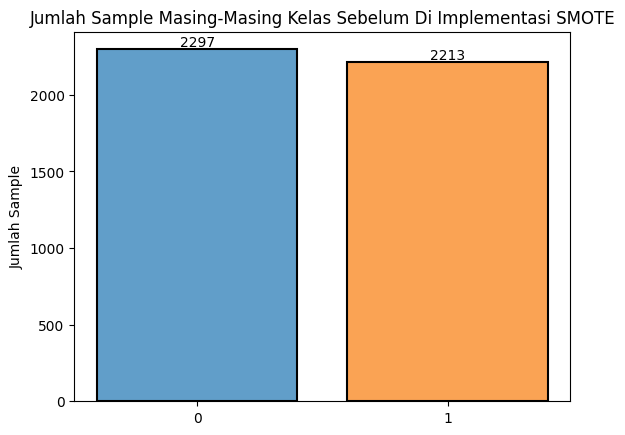

In [129]:
x = ['0', '1']
y = [df['Sarcasm'].value_counts()[0], df['Sarcasm'].value_counts()[1]]


plt.bar(x, y, color=[(0.38, 0.62, 0.79), (0.98, 0.64, 0.33)], edgecolor='black', linewidth=1.5)

for i in range(len(x)):
    plt.text(x[i], y[i], str(y[i]), ha='center', va='bottom')

plt.ylabel('Jumlah Sample')
plt.title('Jumlah Sample Masing-Masing Kelas Sebelum Di Implementasi SMOTE')

plt.show()

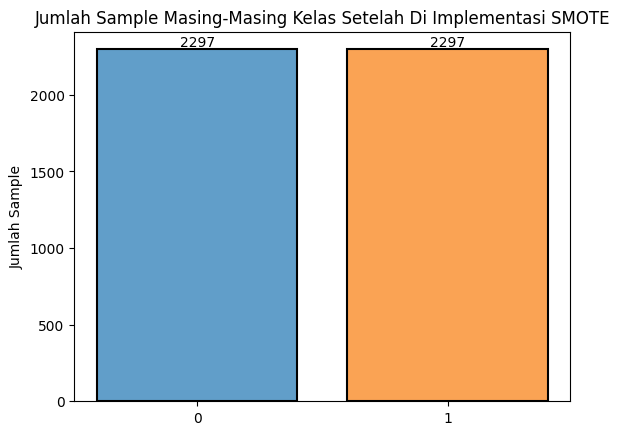

In [130]:
x = ['0', '1']
y = [result[0][1], result[1][1]]


plt.bar(x, y, color=[(0.38, 0.62, 0.79), (0.98, 0.64, 0.33)], edgecolor='black', linewidth=1.5)

for i in range(len(x)):
    plt.text(x[i], y[i], str(y[i]), ha='center', va='bottom')

plt.ylabel('Jumlah Sample')
plt.title('Jumlah Sample Masing-Masing Kelas Setelah Di Implementasi SMOTE')

plt.show()

In [ ]:
# X_embedding = np.array(df_ready['embedding'][:2]).reshape(-1, 1)
# sentiment_values = np.array(df_ready['Sentimen_Text'][:2]).reshape(-1, 1)

# num_rows = X_embedding.shape[0]

# X_sentiment = np.empty((num_rows, 1), dtype=np.str_)

# for i in range(num_rows):
#     X_sentiment[i] = sentiment_values[i % sentiment_values.shape[0]]

# X = np.hstack((X_embedding, X_sentiment))

# X

In [ ]:
# y = df_ready['Sarcasm']

# y

In [ ]:
# from sklearn.neighbors import NearestNeighbors

# def get_k_nearest_neighbors(X, sample, k):
#     # Mencari tetangga terdekat menggunakan k-NN
#     knn = NearestNeighbors(n_neighbors=k+1)
#     knn.fit(X)
    
#     # Mengembalikan indeks tetangga terdekat untuk sampel
#     _, indices = knn.kneighbors([sample])
#     indices_1d = indices.flatten()  # Mengubah menjadi 1D array
    
#     return indices_1d[1:]  # Menghilangkan indeks diri sendiri

In [ ]:
# import pandas as pd
# import numpy as np
# import math

# def SMOTE(df, k, oversampling_ratio):
#     # Mendapatkan array numpy dari fitur embedding, sentiment, dan label
#     embeddings = np.vstack(df['embedding'].to_numpy())
#     labels = df['Sarcasm'].to_numpy()
    
#     # Menginisialisasi array untuk menyimpan sampel sintetis yang dihasilkan
#     synthetic_samples = []
    
#     # Mencari indeks sampel minoritas dan mayoritas
#     minority_indices = np.where(labels == 1)[0]
#     majority_indices = np.where(labels == 0)[0]
    
#     # Menghitung jumlah sampel sintetis yang akan dibuat untuk kelas minoritas
#     num_minority_samples = len(minority_indices)
#     num_majority_samples = len(majority_indices)
    
#     num_synthetic_samples = min(num_majority_samples - num_minority_samples, math.ceil(num_minority_samples * oversampling_ratio))
    
#     if num_synthetic_samples <= 0:
#         return pd.DataFrame()  # Return empty DataFrame jika tidak ada sampel sintetis yang perlu dibuat
    
#     # Looping melalui setiap sampel minoritas
#     for i in minority_indices:
#         sample = embeddings[i]
        
#         # Mencari tetangga terdekat untuk sampel minoritas
#         neighbors = get_k_nearest_neighbors(embeddings, sample, k)
        
#         # Menghasilkan sampel sintetis
#         for j in range(num_synthetic_samples):
#             # Memilih satu tetangga acak
#             neighbor_index = np.random.choice(neighbors)
            
#             if neighbor_index >= len(embeddings):
#                 continue  # Skip jika indeks tetangga melebihi ukuran data yang valid
            
#             neighbor = embeddings[neighbor_index]
            
#             # Menghitung selisih antara sampel dan tetangga
#             diff = neighbor - sample
            
#             # Menghasilkan sampel sintetis dengan proporsi acak
#             proportion = np.random.uniform(0, 1, size=1)
#             synthetic_sample = sample + proportion * diff
            
#             # Menambahkan sampel sintetis ke array
#             synthetic_samples.append(synthetic_sample)
    
#     # Mengubah array numpy ke DataFrame
#     embedding_array = np.vstack(synthetic_samples)
#     embedding_df = pd.DataFrame(embedding_array, columns=['embedding'] * embedding_array.shape[1])
#     sarcasm_df = pd.DataFrame(np.zeros((embedding_array.shape[0], 1)), columns=['Sarcasm'])
#     synthetic_df = pd.concat([embedding_df, sarcasm_df], axis=1)
    
#     # Menambahkan label kelas minoritas pada data sintetis
#     synthetic_df['Sarcasm'] = 1

#     return synthetic_df

In [ ]:
# oversampled_df = SMOTE(df_ready, k=5, oversampling_ratio=1.0)

<h1>Training Bi-LSTM<h1>

In [9]:
# Bi-LSTM Algorithm

import numpy as np
import pickle as pkl

# activation function sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Turunan activation function sigmoid
def sigmoid_derivative(x):
    return x * (1 - x)

# activation function tanh
def tanh(x):
    return np.tanh(x)

# Turunan activation function tanh
def tanh_derivative(x):
    return 1 - x**2

class BiLSTM:
    # Constructor
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Parameter untuk Input Gate
        self.W_i = np.random.uniform(-1, 1, (hidden_size, input_size))
        self.U_i = np.random.uniform(-1, 1, (hidden_size, hidden_size))
        self.b_i = np.zeros((hidden_size, 1))
        
        # Parameter untuk Forget Gate
        self.W_f = np.random.uniform(-1, 1, (hidden_size, input_size))
        self.U_f = np.random.uniform(-1, 1, (hidden_size, hidden_size))
        self.b_f = np.zeros((hidden_size, 1))
        
        # Parameter untuk Output Gate
        self.W_o = np.random.uniform(-1, 1, (hidden_size, input_size))
        self.U_o = np.random.uniform(-1, 1, (hidden_size, hidden_size))
        self.b_o = np.zeros((hidden_size, 1))
        
        # Parameter untuk Cell State
        self.W_c = np.random.uniform(-1, 1, (hidden_size, input_size))
        self.U_c = np.random.uniform(-1, 1, (hidden_size, hidden_size))
        self.b_c = np.zeros((hidden_size, 1))
        
        # Parameter untuk output layer
        self.W_y = np.random.uniform(-1, 1, (output_size, hidden_size*2))
        self.b_y = np.zeros((output_size, 1))

        self.count = 0
        
    def forward_backward(self, x):
        T = len(x)
        # print(T)
        self.count += 1

        self.h_forward = np.zeros((T + 1, self.hidden_size))
        self.c_forward = np.zeros((T + 1, self.hidden_size))
        self.h_backward = np.zeros((T + 1, self.hidden_size))
        self.c_backward = np.zeros((T + 1, self.hidden_size))
        self.gates_forward = np.zeros((T, self.hidden_size*4, 8))
        self.gates_backward = np.zeros((T, self.hidden_size*4, 8))
        self.outputs = np.zeros((T, self.output_size))
        
        for t in range(T):
            # Forward
            self.gates_forward[t] = np.concatenate([
                sigmoid(self.W_i @ x[t] + self.U_i @ self.h_forward[t] + self.b_i),
                sigmoid(self.W_f @ x[t] + self.U_f @ self.h_forward[t] + self.b_f),
                sigmoid(self.W_o @ x[t] + self.U_o @ self.h_forward[t] + self.b_o),
                tanh(self.W_c @ x[t] + self.U_c @ self.h_forward[t] + self.b_c)
            ])
        
            print(f'Forget Gate Forward Iterasi {self.count}: {sigmoid(self.W_f @ x[t] + self.U_f @ self.h_forward[t] + self.b_f)}\n')
            print(f'Input Gate Forward Iterasi {self.count}: {sigmoid(self.W_i @ x[t] + self.U_i @ self.h_forward[t] + self.b_i)}\n')
            print(f'Output Gate Forward Iterasi {self.count}: {sigmoid(self.W_o @ x[t] + self.U_o @ self.h_forward[t] + self.b_o)}\n')
            self.c_forward[t + 1] = self.gates_forward[t, 1] * self.c_forward[t] + self.gates_forward[t, 0] * self.gates_forward[t, 3]
            self.h_forward[t + 1] = self.gates_forward[t, 2] * tanh(self.c_forward[t + 1])

            print(f'Cell State Forward Iterasi {self.count}: {self.gates_forward[t, 1] * self.c_forward[t] + self.gates_forward[t, 0] * self.gates_forward[t, 3]}\n')
            print(f'Hidden State Forward Iterasi {self.count}: {self.gates_forward[t, 2] * tanh(self.c_forward[t + 1])}\n')

            # backward
            t_backward = T - t - 1
            self.gates_backward[t_backward] = np.concatenate([
                sigmoid(self.W_i @ x[t_backward] + self.U_i @ self.h_backward[t_backward] + self.b_i),
                sigmoid(self.W_f @ x[t_backward] + self.U_f @ self.h_backward[t_backward] + self.b_f),
                sigmoid(self.W_o @ x[t_backward] + self.U_o @ self.h_backward[t_backward] + self.b_o),
                tanh(self.W_c @ x[t_backward] + self.U_c @ self.h_backward[t_backward] + self.b_c)
            ])
            
            print(f'Forget Gate Backward Iterasi {self.count}: {sigmoid(self.W_f @ x[t_backward] + self.U_f @ self.h_backward[t_backward] + self.b_f)}\n')
            print(f'Input Gate Backward Iterasi {self.count}: {sigmoid(self.W_i @ x[t_backward] + self.U_i @ self.h_backward[t_backward] + self.b_i)}\n')
            print(f'Output Gate Backward Iterasi {self.count}: {sigmoid(self.W_o @ x[t_backward] + self.U_o @ self.h_backward[t_backward] + self.b_o)}\n')
            self.c_backward[t_backward + 1] = self.gates_backward[t_backward, 1] * self.c_backward[t_backward] + self.gates_backward[t_backward, 0] * self.gates_backward[t_backward, 3]
            self.h_backward[t_backward + 1] = self.gates_backward[t_backward, 2] * tanh(self.c_backward[t_backward + 1])

            print(f'Cell State Backward Iterasi {self.count}: {self.gates_backward[t_backward, 1] * self.c_backward[t_backward] + self.gates_backward[t_backward, 0] * self.gates_backward[t_backward, 3]}\n')
            print(f'Hidden State Backward Iterasi {self.count}: {self.gates_backward[t_backward, 2] * tanh(self.c_backward[t_backward + 1])}\n')

            # Merged Forward and Backward LSTM
            merged_output = np.concatenate([self.h_forward[t + 1], self.h_backward[t_backward + 1]])
            # h_reshaped = np.reshape(merged_output, (self.hidden_size*2,))
            # print(f'Final Output Reshape: {h_reshaped}\n')
            sigmoids = sigmoid(self.W_y @ merged_output + self.b_y)
            # print(f'Sigmoids: {sigmoids.shape}\n')
            self.outputs[t] = sigmoids[0]
        print(f'Merged Output: {merged_output}\n')
        print(f'final Outputs{self.outputs}\n')
        
        return self.outputs
    
    def backPropagation(self, x, y, learning_rate):
        T = len(x)
        dW_i, dU_i, db_i = np.zeros_like(self.W_i), np.zeros_like(self.U_i), np.zeros_like(self.b_i)
        dW_f, dU_f, db_f = np.zeros_like(self.W_f), np.zeros_like(self.U_f), np.zeros_like(self.b_f)
        dW_o, dU_o, db_o = np.zeros_like(self.W_o), np.zeros_like(self.U_o), np.zeros_like(self.b_o)
        dW_c, dU_c, db_c = np.zeros_like(self.W_c), np.zeros_like(self.U_c), np.zeros_like(self.b_c)
        dW_y, db_y = np.zeros_like(self.W_y), np.zeros_like(self.b_y)
        dc_next = np.zeros((1, self.hidden_size))
        dh_next = np.zeros((1, self.hidden_size))
        
        for t in reversed(range(T)):
            dy = self.outputs[t]
            # print(f'Outputs: {dy}\n')
            # print(f'{y[t]}\n')
            dy[y[t]] -= 1
            # print(f'Outputs minus 1{dy}\n')
            dy_transpose = dy.reshape(1, -1).T
            # print(f'Shape dy_transpose: {dy_transpose.shape}\n')
            # print(f'Shape self.W_y.T : {self.W_y.shape}\n')
            dh_forward = self.W_y.T @ dy_transpose + dh_next
            # print(f'Shape dh_forward: {dh_forward.shape}\n')
            dc_forward = dh_forward * self.gates_forward[t, 2] * tanh_derivative(tanh(self.c_forward[t + 1])) + dc_next
            dh_backward = self.W_y.T @ dy_transpose + dh_next
            dc_backward = dh_backward * self.gates_backward[t, 2] * tanh_derivative(tanh(self.c_backward[t + 1])) + dc_next
            
            # print(f'Shape dy_transpose: {dy_transpose.shape}\n')
            # print(f'Shape dW_y: {dW_y.shape}\n')
            # print(f'Shape self.h_forward: {self.h_forward[t + 1].shape}\n')
            # dW_y += dy_transpose @ np.expand_dims(self.h_forward[t + 1], axis=0) + dy_transpose @ np.expand_dims(self.h_backward[t + 1], axis=0) # Salah
            dW_y += dy_transpose @ np.expand_dims(np.concatenate([self.h_forward[t + 1], self.h_backward[t + 1][:self.hidden_size]]), axis=0) # Benar
            db_y += dy_transpose
            
            # print(f'dc_forward: {dc_forward.shape}, self.gates_forward[t, 3]: {self.gates_forward[t, 3].shape}\n')
            dg_forward = dc_forward * self.gates_forward[t, 2] * tanh_derivative(self.gates_forward[t, 3])
            dg_backward = dc_backward * self.gates_backward[t, 3]

            dgates_forward = self.gates_forward[t]
            # print(f'Shape dgates_forward[3]: {dgates_forward.shape}\n')
            # dg_forward_expanded = np.expand_dims(dg_forward, axis=0)
            dgated = dg_forward * tanh_derivative(dgates_forward[3])
            # print(f'tanh_derivative Shape: {dgated.shape}\n')
            # print(f'Shape dg_forward : {dg_forward.shape}')
            dgates_forward[3][:self.hidden_size] = np.sum(dg_forward[:self.hidden_size] * tanh_derivative(dgates_forward[3])[:self.hidden_size], axis=1) # Error disini
            dgates_forward[0][:self.hidden_size] = np.sum(dc_forward[:self.hidden_size] * self.gates_forward[t, 0], axis=1)
            dgates_forward[1][:self.hidden_size] = np.sum(dc_forward[:self.hidden_size] * self.c_forward[t], axis=1)
            dgates_forward[2][:self.hidden_size] = np.sum(dh_forward[:self.hidden_size] * tanh(self.c_forward[t + 1]) * sigmoid_derivative(dgates_forward[2]), axis=1)

            dgates_backward = self.gates_backward[t]
            dgates_backward[3][:self.hidden_size] = np.sum(dg_backward[:self.hidden_size] * tanh_derivative(dgates_backward[3]))
            dgates_backward[0][:self.hidden_size] = np.sum(dc_backward[:self.hidden_size] * self.gates_backward[t, 0])
            dgates_backward[1][:self.hidden_size] = np.sum(dc_backward[:self.hidden_size] * self.c_backward[t])
            dgates_backward[2][:self.hidden_size] = np.sum(dh_backward[:self.hidden_size] * tanh(self.c_backward[t + 1]) * sigmoid_derivative(dgates_backward[2]))
            
            x_transpose = np.array([x[t]])
            dgates_transpose_forward_0 = np.array([dgates_forward[0]])
            dgates_transpose_forward_1 = np.array([dgates_forward[1]])
            dgates_transpose_forward_2 = np.array([dgates_forward[2]])
            dgates_transpose_forward_3 = np.array([dgates_forward[3]])

            dgates_transpose_backward_0 = np.array([dgates_backward[0]])
            dgates_transpose_backward_1 = np.array([dgates_backward[1]])
            dgates_transpose_backward_2 = np.array([dgates_backward[2]])
            dgates_transpose_backward_3 = np.array([dgates_backward[3]])
            
            dW_i += dgates_transpose_forward_0.T @ x_transpose + dgates_transpose_backward_0.T @ x_transpose
            dU_i += dgates_forward[0] @ self.h_forward[t].T + dgates_backward[0] @ self.h_backward[t].T
            db_i += dgates_transpose_forward_0.T + dgates_transpose_backward_0.T
            
            dW_f += dgates_transpose_forward_1.T @ x_transpose + dgates_transpose_backward_1.T @ x_transpose # Error disini
            dU_f += dgates_forward[1] @ self.h_forward[t].T + dgates_backward[1] @ self.h_backward[t].T
            db_f += dgates_transpose_forward_1.T + dgates_transpose_backward_1.T
            
            dW_o += dgates_transpose_forward_2.T @ x_transpose + dgates_transpose_backward_2.T @ x_transpose
            dU_o += dgates_forward[2] @ self.h_forward[t].T + dgates_backward[2] @ self.h_backward[t].T
            db_o += dgates_transpose_forward_2.T + dgates_transpose_backward_2.T
            
            dW_c += dgates_transpose_forward_3.T @ x_transpose + dgates_transpose_backward_3.T @ x_transpose
            dU_c += dgates_forward[3] @ self.h_forward[t].T + dgates_backward[3] @ self.h_backward[t].T
            db_c += dgates_transpose_forward_3.T + dgates_transpose_backward_3.T
            
            dh_next = self.U_i.T @ dgates_forward[0] + self.U_f.T @ dgates_forward[1] + self.U_o.T @ dgates_forward[2] + self.U_c.T @ dgates_forward[3]
            dc_next = dc_forward * self.gates_forward[t, 1]
        
        for param in [dW_i, dU_i, db_i, dW_f, dU_f, db_f, dW_o, dU_o, db_o, dW_c, dU_c, db_c, dW_y, db_y]:
            np.clip(param, -1, 1, out=param)
        
        self.W_i -= learning_rate * dW_i
        self.U_i -= learning_rate * dU_i
        self.b_i -= learning_rate * db_i
        
        self.W_f -= learning_rate * dW_f
        self.U_f -= learning_rate * dU_f
        self.b_f -= learning_rate * db_f
        
        self.W_o -= learning_rate * dW_o
        self.U_o -= learning_rate * dU_o
        self.b_o -= learning_rate * db_o
        
        self.W_c -= learning_rate * dW_c
        self.U_c -= learning_rate * dU_c
        self.b_c -= learning_rate * db_c
        
        self.W_y -= learning_rate * dW_y
        self.b_y -= learning_rate * db_y
    
    def train(self, x, y, epochs, learning_rate):
        for epoch in range(epochs):
            outputs = self.forward_backward(x)
            self.backPropagation(x, y, learning_rate)
            # print(f'Hasil Prediksi {outputs}')
            outputs = np.clip(outputs, 1e-15, None)
            loss = -np.mean(np.log(outputs[np.arange(len(y)), y]))
            
            print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}')
    
    def predict(self, x):
        T = len(x)
        h_forward = np.zeros((T + 1, self.hidden_size))
        c_forward = np.zeros((T + 1, self.hidden_size))
        h_backward = np.zeros((T + 1, self.hidden_size))
        c_backward = np.zeros((T + 1, self.hidden_size))
        outputs = np.zeros((T, self.output_size))
        
        for t in range(T):
            # Forward
            gates_forward = np.concatenate([
                sigmoid(self.W_i @ x[t] + self.U_i @ h_forward[t] + self.b_i),
                sigmoid(self.W_f @ x[t] + self.U_f @ h_forward[t] + self.b_f),
                sigmoid(self.W_o @ x[t] + self.U_o @ h_forward[t] + self.b_o),
                tanh(self.W_c @ x[t] + self.U_c @ h_forward[t] + self.b_c)
            ])
                
            c_forward[t + 1] = gates_forward[1] * c_forward[t] + gates_forward[0] * gates_forward[3]
            h_forward[t + 1] = gates_forward[2] * tanh(c_forward[t + 1])
                
            # Backward
            t_backward = T - t - 1
            gates_backward = np.concatenate([
                sigmoid(self.W_i @ x[t_backward] + self.U_i @ h_backward[t_backward] + self.b_i),
                sigmoid(self.W_f @ x[t_backward] + self.U_f @ h_backward[t_backward] + self.b_f),
                sigmoid(self.W_o @ x[t_backward] + self.U_o @ h_backward[t_backward] + self.b_o),
                tanh(self.W_c @ x[t_backward] + self.U_c @ h_backward[t_backward] + self.b_c)
            ])
                
            c_backward[t_backward + 1] = gates_backward[1] * c_backward[t_backward] + gates_backward[0] * gates_backward[3]
            h_backward[t_backward + 1] = gates_backward[2] * tanh(c_backward[t_backward + 1])

            merged_output = np.concatenate([h_forward[t + 1], h_backward[t_backward + 1]])
            sigmoids = sigmoid(self.W_y @ merged_output + self.b_y)
            outputs[t] = sigmoids[0]
        
        return np.argmax(outputs, axis=1)
    
    def save_model(self, model, filename):
        with open(filename, 'wb') as f:
            pkl.dump(model, f)


<h2>Testing Model</h2>

In [81]:
import numpy as np

<p>Bi-LSTM</p>

In [201]:
x_train = np.random.rand(10, 3)
x_train = np.array(x_train)
# print(x_train)
y_train = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0])

# Inisialisasi model Bi-LSTM
input_size = x_train.shape[1]
hidden_size = 8
output_size = 2
bilstm = BiLSTM(input_size, hidden_size, output_size)

In [202]:
print(x_train)

[[0.7965739  0.71697891 0.46344893]
 [0.19830376 0.65537762 0.70939397]
 [0.38057289 0.85101899 0.282503  ]
 [0.20252416 0.53008424 0.86430571]
 [0.3514713  0.08584827 0.55378989]
 [0.98193686 0.64939513 0.14129209]
 [0.17191586 0.94171396 0.86097421]
 [0.72376261 0.14561815 0.76735697]
 [0.17038705 0.31025957 0.91513017]
 [0.4479895  0.37346309 0.60846466]]


In [295]:
# Train ML Model
epochs = 100
learning_rate = 0.1
bilstm.train(x_train, y_train, epochs, learning_rate)

Final Output: (16,)

Sigmoids: (2, 2)

Final Output: (16,)

Sigmoids: (2, 2)

Final Output: (16,)

Sigmoids: (2, 2)

Final Output: (16,)

Sigmoids: (2, 2)

Final Output: (16,)

Sigmoids: (2, 2)

Final Output: (16,)

Sigmoids: (2, 2)

Final Output: (16,)

Sigmoids: (2, 2)

Final Output: (16,)

Sigmoids: (2, 2)

Final Output: (16,)

Sigmoids: (2, 2)

Final Output: (16,)

Sigmoids: (2, 2)

Shape Outputs(10, 2)

Shape dy_transpose: (2, 1)

Shape self.W_y.T : (2, 16)

Shape dh_forward: (16, 8)

dc_forward: (16, 8), self.gates_forward[t, 3]: (8,)

Shape dgates_forward[3]: (32, 8)

tanh_derivative Shape: (16, 8)

Shape dg_forward : (16, 8)
Shape dy_transpose: (2, 1)

Shape self.W_y.T : (2, 16)

Shape dh_forward: (16, 8)

dc_forward: (16, 8), self.gates_forward[t, 3]: (8,)

Shape dgates_forward[3]: (32, 8)

tanh_derivative Shape: (16, 8)

Shape dg_forward : (16, 8)
Shape dy_transpose: (2, 1)

Shape self.W_y.T : (2, 16)

Shape dh_forward: (16, 8)

dc_forward: (16, 8), self.gates_forward[t, 3]: 

In [570]:
# Predict
bilstm.predict(np.array([x_train[7]]))

array([0], dtype=int64)

<h1>Sample Datasets BAB 3</h1>

In [10]:
df_bab3 = pd.read_excel('Misc/Sample_Datasets_Bab3_Ready.xlsx')
df_bab3.info()
df_bab3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      8 non-null      int64  
 1   Text            8 non-null      object 
 2   emoji           8 non-null      object 
 3   Tokenized       8 non-null      object 
 4   final_text      8 non-null      object 
 5   text_emoji      8 non-null      object 
 6   Pos_Word        8 non-null      int64  
 7   Neg_Word        8 non-null      int64  
 8   Total_Word      8 non-null      int64  
 9   Pos_Ratio       8 non-null      float64
 10  Neg_Ratio       8 non-null      float64
 11  Sentimen_Text   8 non-null      object 
 12  Tokenize_Emoji  8 non-null      object 
 13  Pos_Emoji       8 non-null      int64  
 14  Neg_Emoji       8 non-null      int64  
 15  Sentimen_Emoji  8 non-null      object 
 16  Sarcasm         8 non-null      object 
dtypes: float64(2), int64(6), object(9)
memo

Unnamed: 0                                               Text  \
0           0  mencemooh putus asa marah sejenis menekankan s...   
1           1  terdengar suara suara indah perjuangan menuntu...   
2           2  wkwkwkkwkwk kesambet nya udah deh kayaknya wok...   
3           3  prettttt gagasan mulu yg dibahas zonk eksekusi...   
4           4  pemborosan bangunan tingkat kampung sebentar b...   

              emoji                                          Tokenized  \
0                 😨  ['mencemooh', 'putus', 'asa', 'marah', 'sejeni...   
1                 😨  ['terdengar', 'suara', 'suara', 'indah', 'perj...   
2                 😨  ['lucu', 'kesambet', '.', 'sudah', 'deh', 'sep...   
3                 😠  ['.', 'gagasan', 'terus', 'yang', 'bahas', 'si...   
4                 😠  ['pemborosan', 'bangunan', 'tingkat', 'kampung...   

                                          final_text  \
0  ['mencemooh', 'putus', 'asa', 'marah', 'sejeni...   
1  ['terdengar', 'suara', 'suara', 'indah', 'perj...   
2                ['lucu', 'kesambet', 'deh', 'lucu']   
3  ['gagasan', 'bahas', 'sial', 'eksekusi', 'lucu...   
4  ['pemborosan', 'bangunan', 'tingkat', 'kampung...   

                                          text_emoji  Pos_Word  Neg_Word  \
0  mencemooh putus asa marah sejenis menekankan s...         7         5   
1  terdengar suara suara indah perjuangan menuntu...         9         6   
2                           lucu kesambet deh lucu 😨         3         2   
3  gagasan bahas sial eksekusi lucu ga malu juala...         8         7   
4  pemborosan bangunan tingkat kampung sebentar b...         5         6   

   Total_Word  Pos_Ratio  Neg_Ratio Sentimen_Text  \
0           7   1.000000   0.714286       Negatif   
1          12   0.750000   0.500000       Positif   
2           4   0.750000   0.500000       Positif   
3          11   0.727273   0.636364       Positif   
4           8   0.625000   0.750000       Negatif   

                                      Tokenize_Emoji  Pos_Emoji  Neg_Emoji  \
0  ['mencemooh', 'putus', 'asa', 'marah', 'sejeni...          0          1   
1  ['terdengar', 'suara', 'suara', 'indah', 'perj...          0          1   
2           ['lucu', 'kesambet', 'deh', 'lucu', '😨']          0          1   
3  ['gagasan', 'bahas', 'sial', 'eksekusi', 'lucu...          0          1   
4  ['pemborosan', 'bangunan', 'tingkat', 'kampung...          0          1   

  Sentimen_Emoji  Sarcasm  
0        Negatif  Negatif  
1        Negatif  Positif  
2        Negatif  Positif  
3        Negatif  Positif  
4        Negatif  Negatif

In [11]:
# Remove unused column/feature
df_bab3 = df_bab3.drop(columns='Unnamed: 0')
df_bab3 = df_bab3.drop(columns='Text')
df_bab3 = df_bab3.drop(columns='emoji')
df_bab3 = df_bab3.drop(columns='Tokenized')
df_bab3 = df_bab3.drop(columns='final_text')
df_bab3 = df_bab3.drop(columns='Pos_Word')
df_bab3 = df_bab3.drop(columns='Neg_Word')
df_bab3 = df_bab3.drop(columns='Total_Word')
df_bab3 = df_bab3.drop(columns='Pos_Ratio')
df_bab3 = df_bab3.drop(columns='Neg_Ratio')
df_bab3 = df_bab3.drop(columns='Tokenize_Emoji')
df_bab3 = df_bab3.drop(columns='Pos_Emoji')
df_bab3 = df_bab3.drop(columns='Neg_Emoji')
df_bab3 = df_bab3.drop(columns='Sentimen_Emoji')

In [12]:
df_bab3['Sarcasm'].value_counts()

Positif    5
Negatif    3
Name: Sarcasm, dtype: int64

In [13]:
df_bab3['text_emoji'][0]

'mencemooh putus asa marah sejenis menekankan suku 😨'

<h2>Word Embedding</h2>

In [14]:
# Membangun model GloVe
glove_model = GloVe(df_bab3['text_emoji'])

# Membangun vocabulary
glove_model.build_vocab_information()

# Membangun co-occurrence matrix
glove_model.build_co_matrix()

# Melatih model GloVe
glove_model.train()

Vocab Size: 67
Difference Iterasi 1: 0.017874458325280347

Loss Iterasi 1: 66.73554065998293

Gradient Embedding "i" Iterasi 1: [-4.41833706e-05 -4.39319491e-05 -7.30202586e-05  1.48795826e-05
  6.55774820e-05 -3.70269162e-05  1.93891452e-05 -3.42257659e-05
 -8.53451125e-05  3.51255120e-05 -4.44898947e-05  6.89345521e-05
 -2.19794748e-05 -2.14933690e-05  6.64754421e-06  8.03511958e-05
  4.38190421e-05 -7.06389761e-05 -1.61905769e-05  7.56469741e-05
  4.58059677e-05 -8.33751240e-05 -2.38175797e-05  4.44064653e-05
 -4.70449555e-05  2.03545275e-06  8.25064807e-05  2.28144038e-05
 -2.15517178e-05  5.69041220e-05  6.93132718e-05  4.24757421e-05
 -5.53542595e-05 -7.95327174e-06  5.22965545e-05 -3.75365788e-06
 -3.65774608e-05  5.16016519e-05 -5.17789887e-05 -2.63233982e-05
  8.16144104e-05  6.80227902e-05  8.46096643e-05 -3.43480275e-05
  5.03869633e-05 -8.89297475e-05 -2.33725611e-05 -8.09591102e-05
 -5.86577219e-05  8.98736651e-05  6.13805815e-05 -4.49605118e-05
  2.24699001e-05 -1.9614950

In [15]:
for word, id in glove_model.word2count.items():
    print(f'{word}: {id}')

mencemooh: 1
putus: 1
asa: 1
marah: 1
sejenis: 1
menekankan: 1
suku: 1
😨: 3
terdengar: 1
suara: 3
indah: 1
perjuangan: 1
menuntut: 1
hak: 1
pemerintah: 1
pengin: 1
mendengar: 1
suar: 1
lucu: 3
kesambet: 1
deh: 1
gagasan: 1
bahas: 1
sial: 1
eksekusi: 1
ga: 2
malu: 1
jualan: 1
berbanng: 1
terbalik: 1
kenyataan: 1
😠: 3
pemborosan: 1
bangunan: 1
tingkat: 1
kampung: 1
sebentar: 2
bangun: 1
bongkar: 1
alhamdulillah: 1
puji: 1
allah: 1
berkah: 1
bpk: 1
anies: 2
baswedan: 2
keren: 1
kemarin: 1
lempar: 4
kaos: 1
mesem: 1
muka: 1
uang: 1
tersenyum: 1
sambo: 1
💯: 2
perduli: 1
penjelasan: 1
puan: 1
kau: 3
orang: 1
sembunyi: 1
suka: 1
rakyat: 2
mengatasnamakan: 1
partai: 1
dompet: 1


In [16]:
glove_model.generate_coomatrix_image()

Image is being processed...
Coocurrence matrix has been successfully generated into an image


In [16]:
glove_model.get_all_embeddings()

{'mencemooh': array([ 4.62596362e-04, -1.69506725e-03,  8.54913120e-04, -3.33041425e-04,
        -4.47902036e-04,  1.39220476e-03, -3.98617033e-03,  9.02054048e-04,
         5.15098993e-04,  4.38386948e-03,  1.37367197e-03,  4.05941875e-03,
         2.93597321e-03, -4.71276387e-03,  3.36234906e-03, -4.56870774e-03,
         2.37370407e-03, -1.66407828e-03, -8.87483237e-04,  2.57379398e-03,
        -2.55368079e-03,  2.70134518e-03,  2.83844361e-03,  3.32811614e-03,
        -4.00146505e-03, -3.69560736e-03, -2.67981260e-03, -4.16473094e-03,
        -4.06029996e-03, -3.93386510e-03,  2.23603701e-03,  4.25763996e-03,
         1.17407613e-03, -2.76803538e-03,  3.81015724e-04, -4.11707337e-03,
        -2.31037102e-03, -2.77155241e-03,  4.88350576e-04,  4.65181967e-03,
        -3.53150831e-03,  1.45256214e-03, -2.36367168e-04, -7.14446411e-04,
         7.27398744e-04,  1.08166063e-03,  1.74550061e-03,  3.07581242e-03,
        -2.50628247e-03, -1.73708243e-03,  1.03419952e-03, -4.40049883e-03,

<h2>SMOTE</h2>

In [17]:
df_bab3['Sentimen_Text'] = df_bab3['Sentimen_Text'].replace('Positif', 1)
df_bab3['Sentimen_Text'] = df_bab3['Sentimen_Text'].replace('Negatif', 0)

df_bab3['Sarcasm'] = df_bab3['Sarcasm'].replace('Positif', 1)
df_bab3['Sarcasm'] = df_bab3['Sarcasm'].replace('Negatif', 0)

In [18]:
# Cek class minoritas
df_bab3['Sarcasm'].value_counts()

1    5
0    3
Name: Sarcasm, dtype: int64

In [19]:
max_len = 50
len_voc = 40000

from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_bab3, test_size=0.3, random_state=42, shuffle=False)

df_train_min = df_train[df_train['Sarcasm'] == 0]
df_train_maj = df_train[df_train['Sarcasm'] == 1]

df_test_min = df_test[df_test['Sarcasm'] == 0]
df_test_maj = df_test[df_test['Sarcasm'] == 1]

df_ready_min = pd.concat([df_train_min, df_test_min])
df_ready_maj = pd.concat([df_train_maj, df_test_maj])

In [20]:
# Tokenizer
tokenizer_min = make_tokenizer(df_ready_min['text_emoji'], len_voc)
tokenizer_maj = make_tokenizer(df_ready_maj['text_emoji'], len_voc)

In [21]:
# Sequence
X_train_min = tokenizer_min.texts_to_sequences(df_train_min['text_emoji'])
X_test_min = tokenizer_min.texts_to_sequences(df_test_min['text_emoji'])
X_train_major = tokenizer_maj.texts_to_sequences(df_train_maj['text_emoji'])
X_test_major = tokenizer_maj.texts_to_sequences(df_test_maj['text_emoji'])

In [22]:
df_train_min

text_emoji  Sentimen_Text  Sarcasm
0  mencemooh putus asa marah sejenis menekankan s...              0        0
4  pemborosan bangunan tingkat kampung sebentar b...              0        0

In [23]:
X_train_min

[[3, 4, 5, 6, 7, 8, 9, 10], [11, 12, 13, 14, 2, 15, 2, 16, 17]]

In [24]:
# Padding
from keras.utils import pad_sequences

X_train_min = pad_sequences(X_train_min, maxlen=max_len, padding='post', truncating='post')
X_test_min = pad_sequences(X_test_min, maxlen=max_len, padding='post', truncating='post')
X_train_major = pad_sequences(X_train_major, maxlen=max_len, padding='post', truncating='post')
X_test_major = pad_sequences(X_test_major, maxlen=max_len, padding='post', truncating='post')

In [25]:
# Stacking Label Minority
y_train_min = df_train_min['Sarcasm'].values
y_test_min = df_test_min['Sarcasm'].values

stack_label_min = np.hstack((y_train_min, y_test_min))

stack_label_min.shape

(3,)

In [26]:
# Stacking Label Majority
y_train_maj = df_train_maj['Sarcasm'].values
y_test_maj = df_test_maj['Sarcasm'].values

stack_label_maj = np.hstack((y_train_maj, y_test_maj))

stack_label_maj.shape

(5,)

In [27]:
# Stacking All Data Minority & Majority
embed_mat_min = make_embedding_matrix(glove, tokenizer_min, len_voc)
embed_mat_maj = make_embedding_matrix(glove, tokenizer_maj, len_voc)

X_train_emb_minority = embed_mat_min[X_train_min]
X_test_emb_minority = embed_mat_min[X_test_min]

X_train_emb_majority = embed_mat_maj[X_train_major]
X_test_emb_majority = embed_mat_maj[X_test_major]

train_size_min, max_len_min, embed_size_min = X_train_emb_minority.shape
X_train_emb_r_min = X_train_emb_minority.reshape(train_size_min, max_len*embed_size_min)

test_size_min, max_len_min, embed_size_min = X_test_emb_minority.shape
X_test_emb_r_min = X_test_emb_minority.reshape(test_size_min, max_len*embed_size_min)

train_size_maj, max_len_maj, embed_size_maj = X_train_emb_majority.shape
X_train_emb_r_maj = X_train_emb_majority.reshape(train_size_maj, max_len*embed_size_maj)

test_size_maj, max_len_maj, embed_size_maj = X_test_emb_majority.shape
X_test_emb_r_maj = X_test_emb_majority.reshape(test_size_maj, max_len*embed_size_maj)

stack_minority = np.vstack((X_train_emb_r_min, X_test_emb_r_min))

stack_majority = np.vstack((X_train_emb_r_maj, X_test_emb_r_maj))

C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3378: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [28]:
X_train_emb_minority[1]

array([[ 0.00299505, -0.00194782, -0.00413021, ...,  0.00604299,
         0.00141403,  0.00534395],
       [ 0.0957223 ,  0.01495281,  0.04779208, ...,  0.00552726,
         0.09100901, -0.04028388],
       [-0.2058517 ,  0.15680079,  0.10171054, ..., -0.04086229,
        -0.1840962 ,  0.05723057],
       ...,
       [ 0.05995303, -0.03404213,  0.07658454, ...,  0.05773499,
         0.00631562, -0.03755608],
       [ 0.05995303, -0.03404213,  0.07658454, ...,  0.05773499,
         0.00631562, -0.03755608],
       [ 0.05995303, -0.03404213,  0.07658454, ...,  0.05773499,
         0.00631562, -0.03755608]])

In [29]:
print(f'Shape stack minority: {stack_minority.shape}')
print(f'Shape stack majority{stack_majority.shape}')

Shape stack minority: (3, 5000)
Shape stack majority(5, 5000)


In [30]:
# Running SMOTE
total_size = train_size_maj + train_size_min + test_size_maj + test_size_min

X_minority = stack_minority
y_minority = stack_label_min
X_majority = stack_majority
y_majority = stack_label_maj

X_oversampled, y_oversampled = smote(X_minority, X_majority, y_minority, k=3)

Distance

[[ 7.75079459  7.33832904  7.91009193  8.77206737 10.36403515]
 [ 8.22552423  7.86020044  8.21057974  8.99744073 10.65602702]
 [ 9.10939677  8.95970106  8.96961539 10.1738572  10.93234033]]

Neighbors

[[0 2 3]
 [2 0 3]
 [2 0 3]]

Length : 3

Synthetic Data

[[-0.01082307  0.00946074  0.0114946  ...  0.05773499  0.00631562
  -0.03755608]]
[[-0.00249692  0.00379694  0.00889533 ...  0.05773499  0.00631562
  -0.03755608]]
[[-0.04165692  0.04475938  0.1017727  ...  0.05773499  0.00631562
  -0.03755608]]
(1, 5000)
(1, 5000)
(1, 5000)


In [31]:
final_stack = np.vstack((stack_majority, X_oversampled))

len(final_stack)

11

In [32]:
final_stack = np.delete(final_stack, np.s_[10::], axis=0)

In [33]:
final_stack_label = np.hstack((stack_label_maj, y_oversampled))

final_stack_label = np.delete(final_stack_label, np.s_[10::], axis=0)

In [34]:
print(f'Shape : {final_stack.shape}\n')
print(final_stack)

Shape : (10, 5000)

[[-0.05060703 -0.13146845  0.1419827  ... -0.0671991   0.08163158
   0.03078724]
 [ 0.30487889  0.37926427  0.01081291 ... -0.0671991   0.08163158
   0.03078724]
 [ 0.13917351 -0.00898024 -0.04697791 ... -0.0671991   0.08163158
   0.03078724]
 ...
 [-0.04165692  0.04475938  0.1017727  ...  0.05773499  0.00631562
  -0.03755608]
 [-0.01082307  0.00946074  0.0114946  ...  0.05773499  0.00631562
  -0.03755608]
 [-0.00249692  0.00379694  0.00889533 ...  0.05773499  0.00631562
  -0.03755608]]


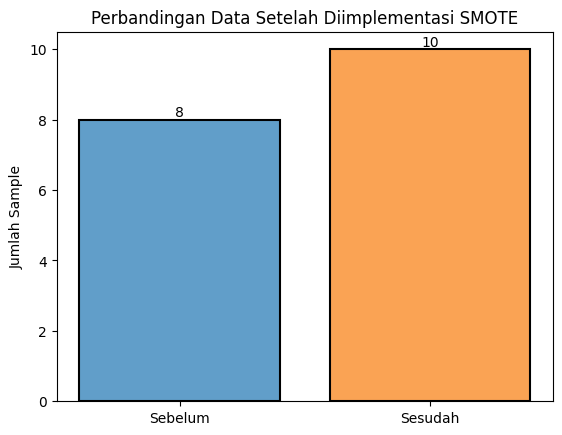

In [35]:
import matplotlib.pyplot as plt

x = ['Sebelum', 'Sesudah']
y = [len(stack_majority) + len(stack_minority), len(final_stack)]


plt.bar(x, y, color=[(0.38, 0.62, 0.79), (0.98, 0.64, 0.33)], edgecolor='black', linewidth=1.5)

for i in range(len(x)):
    plt.text(x[i], y[i], str(y[i]), ha='center', va='bottom')

plt.ylabel('Jumlah Sample')
plt.title('Perbandingan Data Setelah Diimplementasi SMOTE')

plt.show()

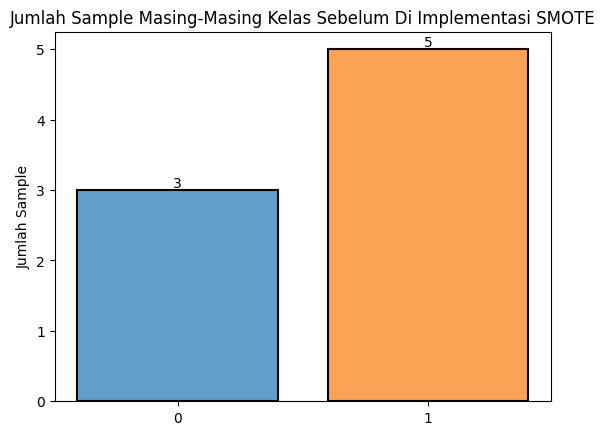

In [36]:
x = ['0', '1']
y = [df_bab3['Sarcasm'].value_counts()[0], df_bab3['Sarcasm'].value_counts()[1]]


plt.bar(x, y, color=[(0.38, 0.62, 0.79), (0.98, 0.64, 0.33)], edgecolor='black', linewidth=1.5)

for i in range(len(x)):
    plt.text(x[i], y[i], str(y[i]), ha='center', va='bottom')

plt.ylabel('Jumlah Sample')
plt.title('Jumlah Sample Masing-Masing Kelas Sebelum Di Implementasi SMOTE')

plt.show()

In [37]:
# Menghitung Jumlah Akhir Sample pada Class 0 dan 1
unique, counts = np.unique(final_stack_label, return_counts=True)
result = np.asarray((unique, counts)).T.astype(int)

print(result)

[[0 5]
 [1 5]]


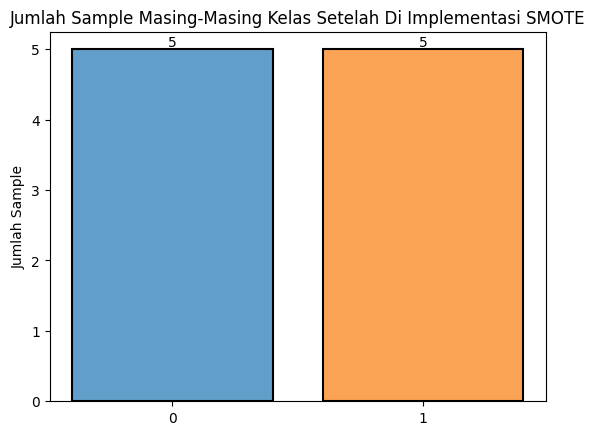

In [38]:
x = ['0', '1']
y = [result[0][1], result[1][1]]


plt.bar(x, y, color=[(0.38, 0.62, 0.79), (0.98, 0.64, 0.33)], edgecolor='black', linewidth=1.5)

for i in range(len(x)):
    plt.text(x[i], y[i], str(y[i]), ha='center', va='bottom')

plt.ylabel('Jumlah Sample')
plt.title('Jumlah Sample Masing-Masing Kelas Setelah Di Implementasi SMOTE')

plt.show()

<h2>Bi-LSTM</h2>

In [49]:
x_train = final_stack
x_train = np.array(x_train)
label = final_stack_label.astype('int')
y_train = label

# Inisialisasi model Bi-LSTM
input_size = x_train.shape[1]
hidden_size = 8
output_size = 2
bilstm = BiLSTM(input_size, hidden_size, output_size)

In [50]:
# Train ML Model
epochs = 100
learning_rate = 0.01
bilstm.train(x_train, y_train, epochs, learning_rate)

Forget Gate Forward Iterasi 1: [[8.97614255e-01 9.80034456e-01 3.61139368e-02 8.97206284e-02
  5.59799008e-05 7.83393970e-02 2.63601803e-01 4.51937013e-01]
 [8.97614255e-01 9.80034456e-01 3.61139368e-02 8.97206284e-02
  5.59799008e-05 7.83393970e-02 2.63601803e-01 4.51937013e-01]
 [8.97614255e-01 9.80034456e-01 3.61139368e-02 8.97206284e-02
  5.59799008e-05 7.83393970e-02 2.63601803e-01 4.51937013e-01]
 [8.97614255e-01 9.80034456e-01 3.61139368e-02 8.97206284e-02
  5.59799008e-05 7.83393970e-02 2.63601803e-01 4.51937013e-01]
 [8.97614255e-01 9.80034456e-01 3.61139368e-02 8.97206284e-02
  5.59799008e-05 7.83393970e-02 2.63601803e-01 4.51937013e-01]
 [8.97614255e-01 9.80034456e-01 3.61139368e-02 8.97206284e-02
  5.59799008e-05 7.83393970e-02 2.63601803e-01 4.51937013e-01]
 [8.97614255e-01 9.80034456e-01 3.61139368e-02 8.97206284e-02
  5.59799008e-05 7.83393970e-02 2.63601803e-01 4.51937013e-01]
 [8.97614255e-01 9.80034456e-01 3.61139368e-02 8.97206284e-02
  5.59799008e-05 7.83393970e-02 

In [51]:
y_train

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [63]:
x_train[9]

array([-0.00249692,  0.00379694,  0.00889533, ...,  0.05773499,
        0.00631562, -0.03755608])

In [53]:
# Predict ML Model
print(f'Predict Data 1 : {bilstm.predict(np.array([x_train[0]]))}\n')
print(f'Predict Data 2 : {bilstm.predict(np.array([x_train[1]]))}\n')
print(f'Predict Data 3 : {bilstm.predict(np.array([x_train[2]]))}\n')
print(f'Predict Data 4 : {bilstm.predict(np.array([x_train[3]]))}\n')
print(f'Predict Data 5 : {bilstm.predict(np.array([x_train[4]]))}\n')
print(f'Predict Data 6 : {bilstm.predict(np.array([x_train[5]]))}\n')
print(f'Predict Data 7 : {bilstm.predict(np.array([x_train[6]]))}\n')
print(f'Predict Data 8 : {bilstm.predict(np.array([x_train[7]]))}\n')
print(f'Predict Data 9 : {bilstm.predict(np.array([x_train[8]]))}\n')
print(f'Predict Data 10 : {bilstm.predict(np.array([x_train[9]]))}\n')

Predict Data 1 : [1]

Predict Data 2 : [1]

Predict Data 3 : [1]

Predict Data 4 : [1]

Predict Data 5 : [0]

Predict Data 6 : [0]

Predict Data 7 : [0]

Predict Data 8 : [0]

Predict Data 9 : [0]

Predict Data 10 : [0]

